In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r'C:\Users\shikh\Downloads\data.csv')
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [3]:
df.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


In [4]:
df.isnull().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [5]:
df.dtypes

type_school               object
school_accreditation      object
gender                    object
interest                  object
residence                 object
parent_age                 int64
parent_salary              int64
house_area               float64
average_grades           float64
parent_was_in_college       bool
will_go_to_college          bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


<AxesSubplot:>

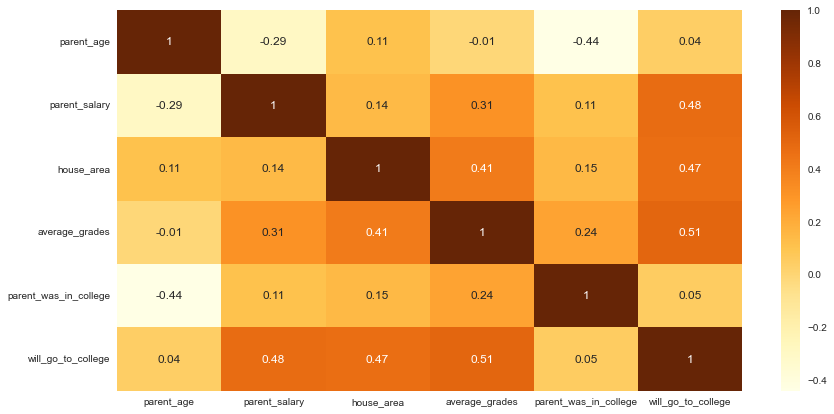

In [7]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [8]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


<AxesSubplot:xlabel='will_go_to_college', ylabel='count'>

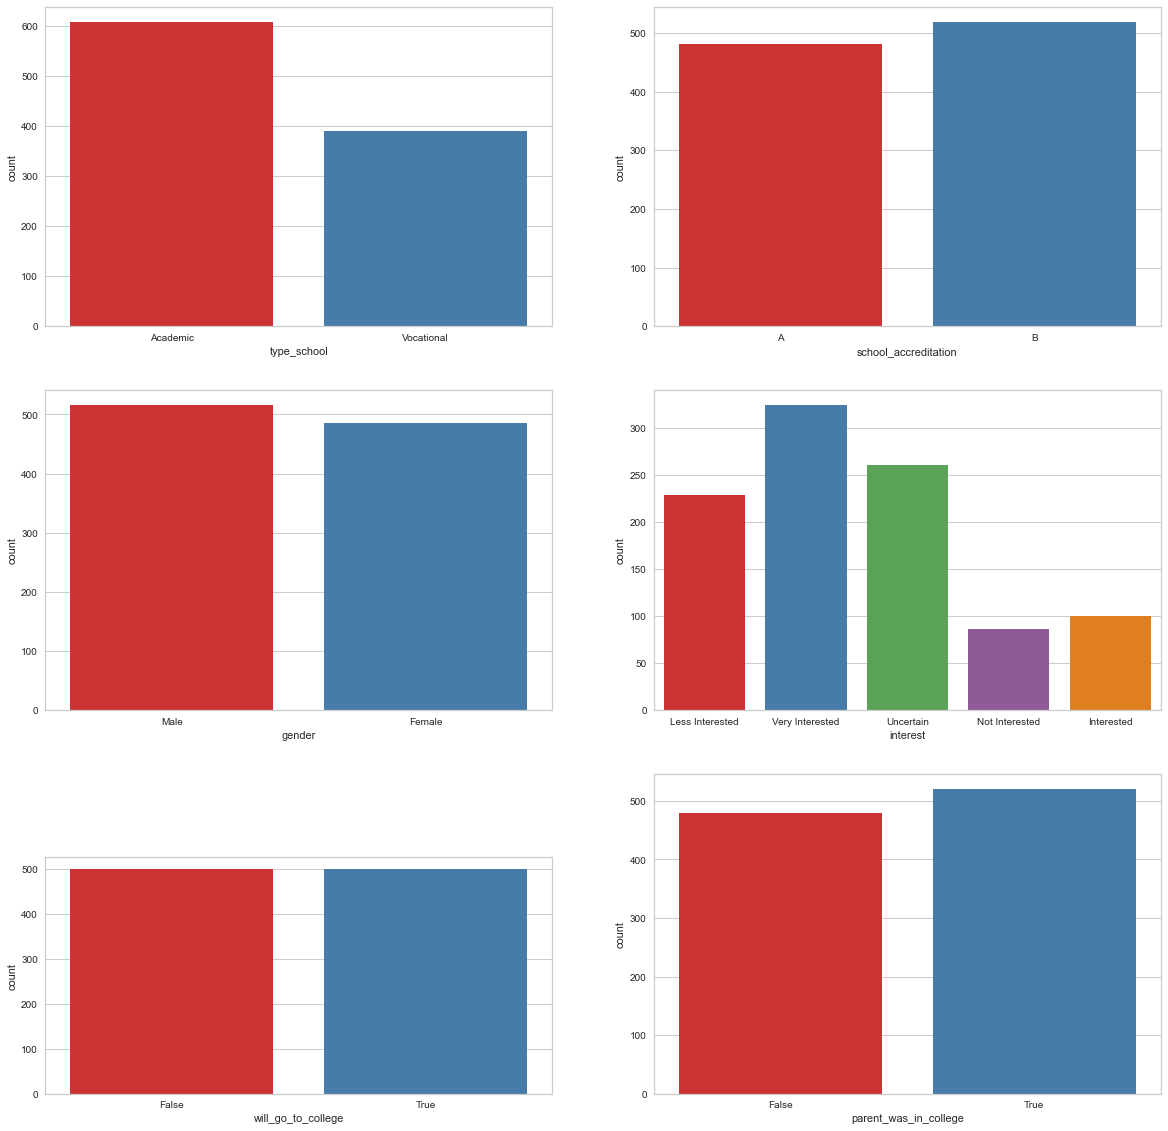

In [9]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'type_school', palette='Set1', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'school_accreditation', palette='Set1', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'gender', palette='Set1', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'interest', palette='Set1', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'residence', palette='Set1', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'parent_was_in_college', palette='Set1', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'will_go_to_college', palette='Set1', data = df)

In [10]:
print(df['type_school'].value_counts(),"\n")
print(df['school_accreditation'].value_counts(),"\n")
print(df['gender'].value_counts(),"\n")
print(df['interest'].value_counts(),"\n")
print(df['residence'].value_counts())
print(df['parent_was_in_college'].value_counts(),"\n")
print(df['will_go_to_college'].value_counts(),"\n")

Academic      609
Vocational    391
Name: type_school, dtype: int64 

B    519
A    481
Name: school_accreditation, dtype: int64 

Male      515
Female    485
Name: gender, dtype: int64 

Very Interested    324
Uncertain          261
Less Interested    229
Interested         100
Not Interested      86
Name: interest, dtype: int64 

Urban    539
Rural    461
Name: residence, dtype: int64
True     520
False    480
Name: parent_was_in_college, dtype: int64 

True     500
False    500
Name: will_go_to_college, dtype: int64 



C:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_grades'>

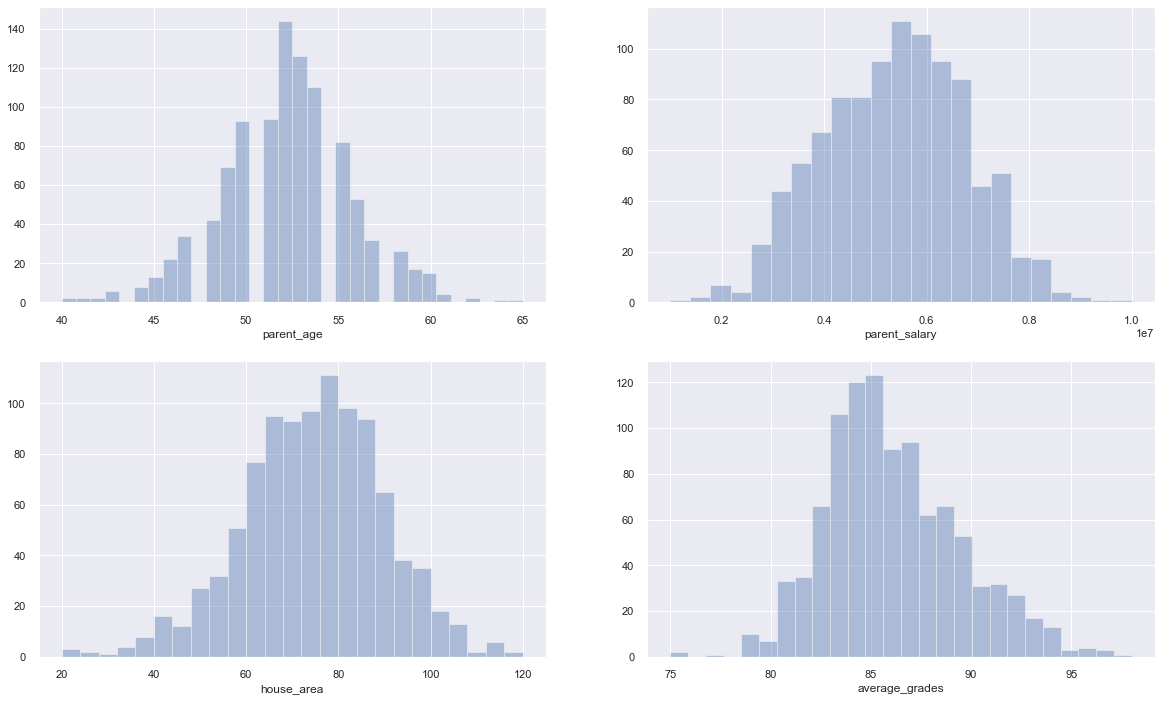

In [11]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.distplot(df.parent_age, kde = False)

plt.subplot(4,2,2)
sns.distplot(df.parent_salary, kde = False)

plt.subplot(4,2,3)
sns.distplot(df.house_area, kde = False)

plt.subplot(4,2,4)
sns.distplot(df.average_grades, kde = False)

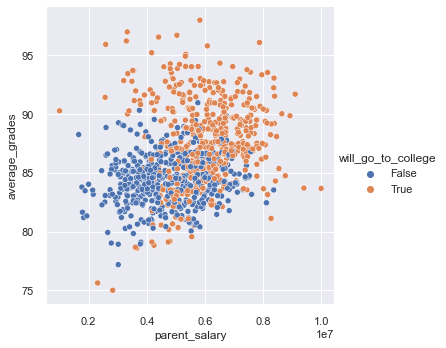

In [12]:
sns.relplot(x='parent_salary', y = 'average_grades', hue = "will_go_to_college", data = df)

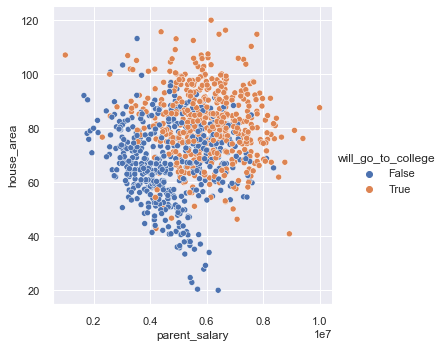

In [13]:
sns.relplot(x='parent_salary', y = 'house_area', hue = "will_go_to_college", data = df)

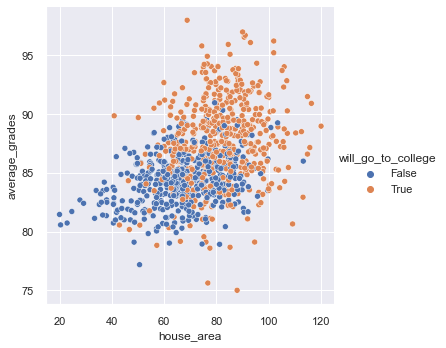

In [14]:
sns.relplot(x='house_area', y = 'average_grades', hue = "will_go_to_college", data = df)

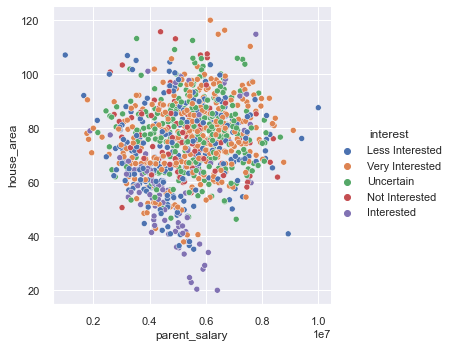

In [15]:
sns.relplot(x='parent_salary', y = 'house_area', hue = "interest", data = df)

In [16]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values

In [17]:
label_encoder_type_school = LabelEncoder()
label_encoder_school_accreditation = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_interest = LabelEncoder()
label_encoder_residence = LabelEncoder()
label_encoder_parent_was_in_college = LabelEncoder()
label_encoder_will_go_to_college = LabelEncoder()

In [18]:
X[:,0] = label_encoder_type_school.fit_transform(X[:,0])
X[:,1] = label_encoder_school_accreditation.fit_transform(X[:,1])
X[:,2] = label_encoder_gender.fit_transform(X[:,2])
X[:,3] = label_encoder_interest.fit_transform(X[:,3])
X[:,4] = label_encoder_residence.fit_transform(X[:,4])
X[:,9] = label_encoder_parent_was_in_college.fit_transform(X[:,9])
y = label_encoder_will_go_to_college.fit_transform(y)

In [19]:
standard = StandardScaler()
X_standard = standard.fit_transform(X)
minmax = MinMaxScaler().fit(X)
X_minmax = minmax.transform(X)

# Random Forest Classifier

In [20]:
def random_forest_model(X,y, criterion='gini',test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    print(f'X_train.shape = {X_train.shape}\n y_train.shape = {y_train.shape}')
    print(f'X_test.shape = {X_test.shape} \n y_test.shape = {y_test.shape}')
    random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, criterion=criterion, random_state=0)
    print(random_forest.fit(X_train, y_train))
    y_cap = random_forest.predict(X_test)
    cm = ConfusionMatrix(random_forest)
    print(cm.fit(X_train, y_train))
    score = cm.score(X_test, y_test)
    print(f'score = {score}')
    classification_random = (classification_report(y_test, y_cap))
    print(f'CLASSIFICATION REPORT :  \n {classification_random}')
    columns = df.iloc[:, 0:10].columns
    feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
    print(f'IMPORTANT FEATURES : \n {feature_imp}')
    return score

Original data, criterion = 'entropy'

X_train.shape = (700, 10)
 y_train.shape = (700,)
X_test.shape = (300, 10) 
 y_test.shape = (300,)
RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A841FA0>,
                estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=3, random_state=0))
score = 0.8166666666666667
CLASSIFICATION REPORT :  
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       144
           1       0.88      0.75      0.81       156

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

IMPORTANT FEATURES : 
 average_grades           0.386110
house_area               0.237443
parent_salary            0.236666
interest                 0.051425
parent_age        

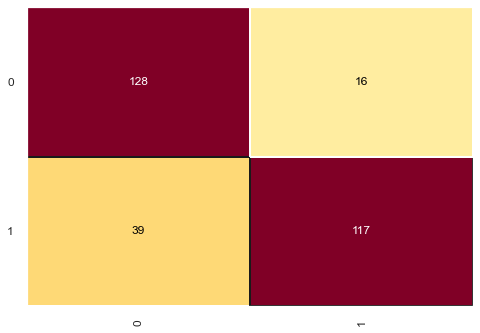

In [21]:
score_entropy_original = random_forest_model(X, y, 'entropy')

Original data, criterion = 'gini'

X_train.shape = (700, 10)
 y_train.shape = (700,)
X_test.shape = (300, 10) 
 y_test.shape = (300,)
RandomForestClassifier(max_depth=3, random_state=0)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A885E80>,
                estimator=RandomForestClassifier(max_depth=3, random_state=0))
score = 0.8166666666666667
CLASSIFICATION REPORT :  
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       144
           1       0.88      0.75      0.81       156

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

IMPORTANT FEATURES : 
 average_grades           0.393703
house_area               0.238691
parent_salary            0.235221
interest                 0.048627
parent_age               0.038433
residence                0.022797
type_school              0.014351
parent_

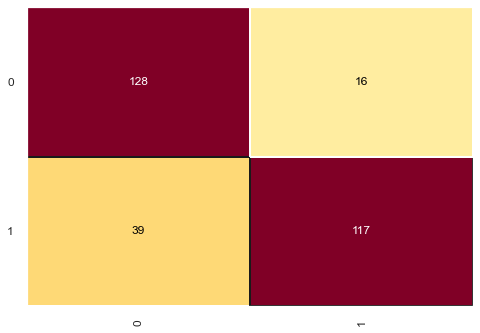

In [22]:
score_gini_original = random_forest_model(X, y)

Standard data, criterion= 'entropy'

X_train.shape = (700, 10)
 y_train.shape = (700,)
X_test.shape = (300, 10) 
 y_test.shape = (300,)
RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A8EDFD0>,
                estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=3, random_state=0))
score = 0.8166666666666667
CLASSIFICATION REPORT :  
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       144
           1       0.88      0.75      0.81       156

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

IMPORTANT FEATURES : 
 average_grades           0.386110
house_area               0.237443
parent_salary            0.236666
interest                 0.051425
parent_age        

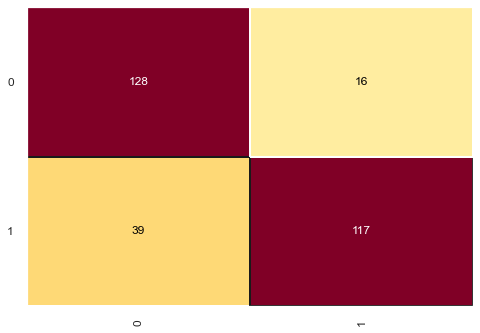

In [23]:
score_entropy_standard = random_forest_model(X_standard, y, criterion='entropy')

Standard data, criterion= 'gini'

X_train.shape = (700, 10)
 y_train.shape = (700,)
X_test.shape = (300, 10) 
 y_test.shape = (300,)
RandomForestClassifier(max_depth=3, random_state=0)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A910370>,
                estimator=RandomForestClassifier(max_depth=3, random_state=0))
score = 0.8166666666666667
CLASSIFICATION REPORT :  
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       144
           1       0.88      0.75      0.81       156

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

IMPORTANT FEATURES : 
 average_grades           0.393703
house_area               0.238691
parent_salary            0.235221
interest                 0.048627
parent_age               0.038433
residence                0.022797
type_school              0.014351
parent_

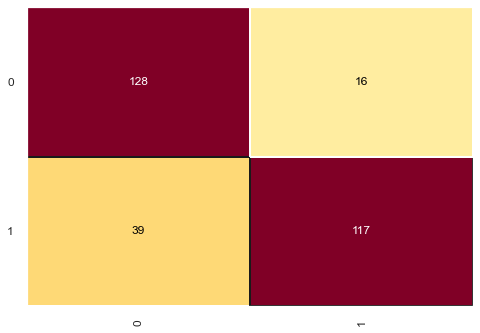

In [24]:
score_gini_standard = random_forest_model(X_standard, y)

Minmax data, criteria = 'entropy'

X_train.shape = (700, 10)
 y_train.shape = (700,)
X_test.shape = (300, 10) 
 y_test.shape = (300,)
RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A92BFD0>,
                estimator=RandomForestClassifier(criterion='entropy',
                                                 max_depth=3, random_state=0))
score = 0.8166666666666667
CLASSIFICATION REPORT :  
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       144
           1       0.88      0.75      0.81       156

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

IMPORTANT FEATURES : 
 average_grades           0.386110
house_area               0.237443
parent_salary            0.236666
interest                 0.051425
parent_age        

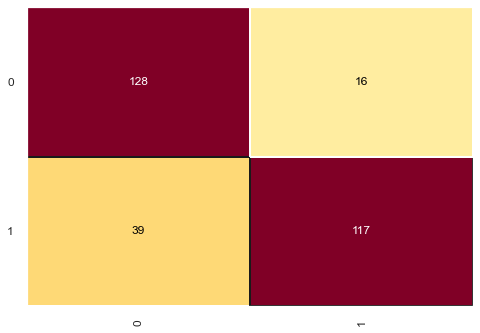

In [25]:
score_entropy_minmax = random_forest_model(X_minmax, y, criterion='entropy')

Minmax data, criteria = 'gini'

X_train.shape = (700, 10)
 y_train.shape = (700,)
X_test.shape = (300, 10) 
 y_test.shape = (300,)
RandomForestClassifier(max_depth=3, random_state=0)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A7651C0>,
                estimator=RandomForestClassifier(max_depth=3, random_state=0))
score = 0.8166666666666667
CLASSIFICATION REPORT :  
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       144
           1       0.88      0.75      0.81       156

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

IMPORTANT FEATURES : 
 average_grades           0.393703
house_area               0.238691
parent_salary            0.235221
interest                 0.048627
parent_age               0.038433
residence                0.022797
type_school              0.014351
parent_

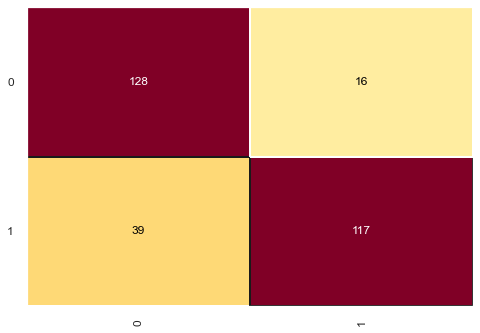

In [26]:
score_gini_minmax = random_forest_model(X_minmax, y)

# Logistic Regression

In [27]:
def logistic_regression_model(X,y,test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')
    print(f'X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')
    logistic = LogisticRegression(random_state = 1)
    print(logistic.fit(X_train, y_train))
    y_cap = logistic.predict(X_test)
    cm = ConfusionMatrix(logistic)
    print(cm.fit(X_train, y_train))
    score = cm.score(X_test, y_test)
    print(f'score = {score}')
    logistic = classification_report(y_test, y_cap)
    print(f'CLASSIFICATION REPORT : \n {logistic}')
    return score

Original data

X_train.shape = (700, 10), y_train.shape = (700,)
X_test.shape = (300, 10), y_test.shape = (300,)
LogisticRegression(random_state=1)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A898DC0>,
                estimator=LogisticRegression(random_state=1))
score = 0.52
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.52      1.00      0.68       156

    accuracy                           0.52       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.27      0.52      0.36       300



C:\Users\shikh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shikh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


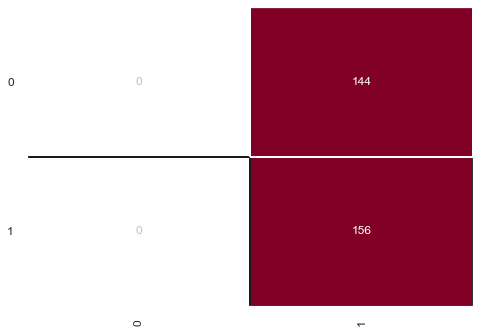

In [28]:
score_original = logistic_regression_model(X,y)

Standard data

X_train.shape = (700, 10), y_train.shape = (700,)
X_test.shape = (300, 10), y_test.shape = (300,)
LogisticRegression(random_state=1)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A8DBA60>,
                estimator=LogisticRegression(random_state=1))
score = 0.8433333333333334
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       144
           1       0.85      0.85      0.85       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



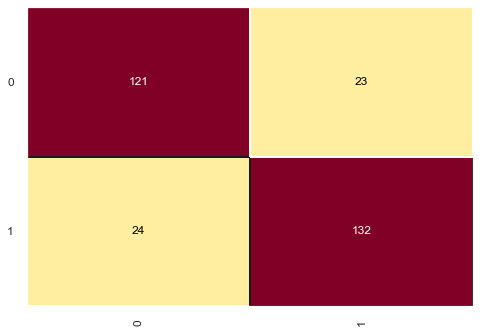

In [29]:
score_standard = logistic_regression_model(X_standard,y)

Minmax data

X_train.shape = (700, 10), y_train.shape = (700,)
X_test.shape = (300, 10), y_test.shape = (300,)
LogisticRegression(random_state=1)
ConfusionMatrix(ax=<AxesSubplot:>,
                cmap=<matplotlib.colors.ListedColormap object at 0x000002058A8215B0>,
                estimator=LogisticRegression(random_state=1))
score = 0.85
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       144
           1       0.86      0.85      0.85       156

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



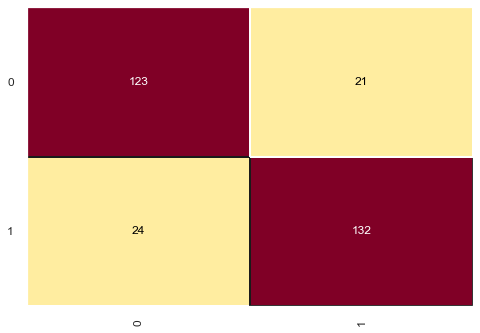

In [30]:
score_minmax = logistic_regression_model(X_minmax,y)

# Results

Collecting the results at one place

In [31]:
Random_forest_1 = {'Model':'Random Forest',
               'Scaling':'Original Data',
               'Type':'Entropy',
               'Precision':score_entropy_original}

Random_forest_2 = {'Model':'Random Forest',
               'Scaling':'Standard data',
               'Type':'Entropy',
               'Precision':score_entropy_standard}

Random_forest_3 = {'Model':'Random Forest',
               'Scaling':'Minmax data',
               'Type':'Entropy',
               'Precision':score_entropy_minmax}

Random_forest_4 = {'Model':'Random Forest',
               'Scaling':'Original Data',
               'Type':'Gini',
               'Precision':score_gini_original}

Random_forest_5 = {'Model':'Random Forest',
               'Scaling':'Standard data',
               'Type':'Gini',
               'Precision':score_gini_standard}

Random_forest_6 = {'Model':'Random Forest',
               'Scaling':'Minmax data',
               'Type':'Gini',
               'Precision':score_gini_minmax}

result_random_forest = pd.DataFrame({'Random_forest_1':pd.Series(Random_forest_1),
                       'Random_forest_2':pd.Series(Random_forest_2),
                       'Random_forest_3':pd.Series(Random_forest_3),
                       'Random_forest_4':pd.Series(Random_forest_4),
                       'Random_forest_5':pd.Series(Random_forest_5),
                       'Random_forest_6':pd.Series(Random_forest_6)})

In [32]:
Logistic_1 = {'Model':'Logistic Regression',
               'Scaling':'Original data',
               'Type':'-',
               'Precision':score_original}

Logistic_2 = {'Model':'Logistic Regression',
               'Scaling':'Standard data',
               'Type':'-',
               'Precision':score_standard}

Logistic_3 = {'Model':'Logistic Regression',
               'Scaling':'Minmax data',
               'Type':'-',
               'Precision':score_minmax}

result_logistic = pd.DataFrame({'Logistic_1':pd.Series(Logistic_1),
                       'Logistic_2':pd.Series(Logistic_2),
                       'Logistic_3':pd.Series(Logistic_3)})

In [33]:
result_random_forest

,Random_forest_1,Random_forest_2,Random_forest_3,Random_forest_4,Random_forest_5,Random_forest_6
Model,Random Forest,Random Forest,Random Forest,Random Forest,Random Forest,Random Forest
Scaling,Original Data,Standard data,Minmax data,Original Data,Standard data,Minmax data
Type,Entropy,Entropy,Entropy,Gini,Gini,Gini
Precision,0.816667,0.816667,0.816667,0.816667,0.816667,0.816667


In [34]:
result_logistic

,Logistic_1,Logistic_2,Logistic_3
Model,Logistic Regression,Logistic Regression,Logistic Regression
Scaling,Original data,Standard data,Minmax data
Type,-,-,-
Precision,0.52,0.843333,0.85
